<font size="7"><span style="color:green">Librerías

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier  
from sklearn.ensemble import AdaBoostClassifier 
    # NOTA
    # para el AdaBoost hay que probar diferentes max_depth del DecisionTreeClassifier para ver cuál es el mejor

import xgboost
    # NOTA
    # xgboost.XGBRFClassifier En cada secuencia tiene un RandomForest
    # xgboost.XGBClassifier sin RandomForest

# ------------------

# Pipeline
from sklearn.pipeline import Pipeline
    # NOTA
    # Hay que poner las etiquetas automáticamente. El otro es 'from sklearn.pipeline import make_pipeline'

# ------------------

# Métricas de validación
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
# ------------------

# GridSearch
from sklearn.model_selection import GridSearchCV

# ------------------

# Balanceo
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek

# ------------------

# Otras
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split


# SEED
seed=45

# LECTURA CSV
vinos = pd.read_csv('data/winequalityN.csv')


--------
<font size="8"><span style="color:red">BLANCO

Value Counts  1    0.665298
0    0.334702
Name: apto, dtype: float64


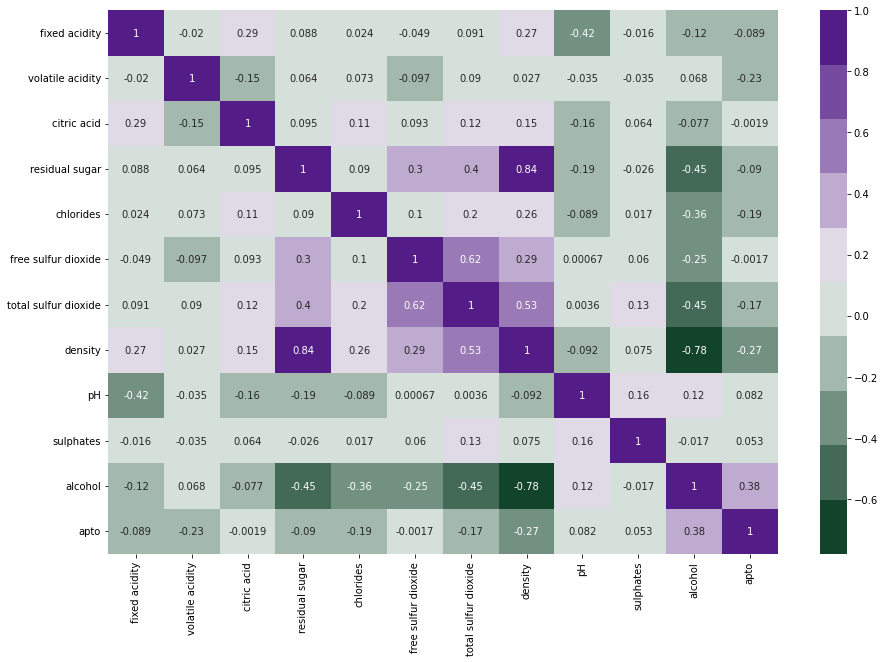

In [15]:
blanco=vinos[vinos['type']=='white'].reset_index()
blanco = blanco.drop(['index', 'type'], axis=1)

blanco = blanco.dropna()

my_dict={3:0, 4:0, 5:0,
        6:1, 7:1, 8:1, 9:1}
blanco['apto']= blanco['quality'].map(my_dict)
blanco = blanco.drop(['quality'], axis=1)

print('Value Counts ', blanco['apto'].value_counts(normalize=True))

plt.figure(figsize=(15,10))
sns.heatmap(blanco.corr(),cmap=sns.diverging_palette(145, 280, s=85, l=25, n=10), annot=True);

In [31]:
X = blanco[['fixed acidity','volatile acidity', 'citric acid','residual sugar', 'chlorides', 'total sulfur dioxide', 'pH','sulphates','alcohol']]
y = blanco['apto']


In [32]:
# print('Value Counts X ', X.value_counts(normalize=True))
print('Value Counts y ', y.value_counts(normalize=True))

Value Counts y  1    0.665298
0    0.334702
Name: apto, dtype: float64


In [5]:
# Balanceo ROS
# ros = RandomOverSampler(random_state=seed)
# X_ros, y_ros = ros.fit_resample(X, y)

# X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.2, random_state=seed)

In [21]:
# Balanceo RUS
# rus = RandomUnderSampler(random_state=seed)
# X_rus, y_rus = rus.fit_resample(X, y)

# X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, test_size=0.2, random_state=seed)

In [25]:
# Balanceo SMOTE
# smote = SMOTE(random_state=seed)
# X_smote, y_smote = smote.fit_resample(X, y)

# X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=seed)

In [33]:
# Balanceo SMOTETomek
smoteT = SMOTE(random_state=seed)
X_smoteT, y_smoteT = smoteT.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_smoteT, y_smoteT, test_size=0.2, random_state=seed)

In [34]:
print('Value Counts y \n', y_smoteT.value_counts(normalize=True))

Value Counts y 
 1    0.5
0    0.5
Name: apto, dtype: float64


c:\Users\Yo\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
1008 fits failed out of a total of 2844.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
474 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Yo\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Yo\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "c:\Users\Yo\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\pipelin

Best model. Best Score 0.8341049382716049 
 --------------------------------------------------
Best model. Best Params {'classifier': GradientBoostingClassifier(learning_rate=0.4, n_estimators=270), 'classifier__learning_rate': 0.4, 'classifier__n_estimators': 270, 'kbest__k': 7} 
 --------------------------------------------------
Accuracy Score 0.8479938271604939 
 --------------------------------------------------
Confusion Matrix 
 [[572 114]
 [ 83 527]] 
 --------------------------------------------------


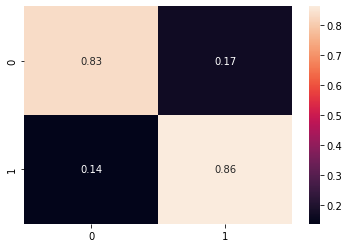

In [35]:


pipe = Pipeline(steps=[('scaler', StandardScaler()),
                       ('kbest', SelectKBest()),
                       ('classifier', LogisticRegression(random_state=seed))])

svm_params = {'kbest__k': [5,7,8,9,10,11],
              'classifier': [SVC()],
              'classifier__C': [0.05,0.1,0.3,0.5],
              'classifier__kernel': ['linear','rbf','sigmoid']
}

log_params = {'kbest__k': [5,7,8,9,10,11],
              'classifier': [LogisticRegression()],
              'classifier__penalty': ['l1','l2'],
              'classifier__C': np.logspace(0,2,5)
}

knn_params = {'kbest__k': [5,7,8,9,10,11],
              'classifier': [KNeighborsClassifier()],
              'classifier__n_neighbors': [3,5,7,9,11,13],
              'classifier__weights': ['uniform','distance']
}

rf_params = {'kbest__k': [5,7,8,9,10,11],
              'classifier': [RandomForestClassifier()],
              'classifier__n_estimators': [100,150,200],
              'classifier__max_depth': [2,3,4,5,6,7],
              'classifier__min_samples_leaf': [3,5,7]
}

gb_params = {'kbest__k': [5,7,8,9,10,11],
              'classifier': [GradientBoostingClassifier()],
              'classifier__n_estimators': [150,200,230,250,270,300],
              'classifier__learning_rate': [0.1,0.2,0.3,0.4,0.5]
}


ada_params = {'kbest__k': [5,7,8,9,10,11],
              'classifier': [AdaBoostClassifier()],
            #   'classifier__max_depth': [2,3,4],
              'classifier__n_estimators': [50,100,150,200],
              'classifier__learning_rate': [0.1,0.3,0.5,0.7,1]
}

xgb_params = {'kbest__k': [5,7,8,9,10,11],
              'classifier': [xgboost.XGBRFClassifier()],
              'classifier__n_estimators': [50,100,150,200],
              'classifier__learning_rate': [0.1,0.2,0.3,0.4,0.5]
}

# FALTA XGBRF
search_space = [svm_params, log_params, knn_params, rf_params, gb_params, ada_params, xgb_params]

clf = GridSearchCV(estimator=pipe, param_grid=search_space, cv=3, n_jobs=-1)
best_model = clf.fit(X_train, y_train)

y_pred = best_model.best_estimator_.predict(X_test)

print('Best model. Best Score', best_model.best_score_, '\n','-'*50)
print('Best model. Best Params', best_model.best_params_, '\n','-'*50)
print('Accuracy Score', accuracy_score(y_test, y_pred), '\n','-'*50)
print('Confusion Matrix \n', confusion_matrix(y_test,y_pred), '\n','-'*50)
sns.heatmap(confusion_matrix(y_test,y_pred, normalize='true'), annot=True);

-----

--------
<font size="8"><span style="color:red">TINTO

In [16]:
tinto=vinos[vinos['type']=='red'].reset_index()
tinto = tinto.drop(['index', 'type'], axis=1)

tinto = tinto.dropna()

my_dict={3:0, 4:0, 5:0,
        6:1, 7:1, 8:1}
tinto['apto']= tinto['quality'].map(my_dict)
tinto = tinto.drop(['quality'], axis=1)

print('Value Counts ', tinto['apto'].value_counts(normalize=True))

plt.figure(figsize=(15,10))
sns.heatmap(tinto.corr(),cmap=sns.diverging_palette(145, 280, s=85, l=25, n=10), annot=True);

X = tinto[['volatile acidity', 'citric acid', 'chlorides', 'total sulfur dioxide', 'pH','sulphates','alcohol']]
y = tinto['apto']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

pipe = Pipeline(steps=[('scaler', StandardScaler()),
                       ('kbest', SelectKBest()),
                       ('classifier', LogisticRegression(random_state=seed))])

svm_params = {'kbest__k': [5,7,9,11],
              'classifier': [SVC()],
              'classifier__C': [0.05,0.1,0.3,0.5],
              'classifier__kernel': ['linear','rbf','sigmoid']
}

log_params = {'kbest__k': [5,7,9,11],
              'classifier': [LogisticRegression()],
              'classifier__penalty': ['l1','l2'],
              'classifier__C': np.logspace(0,2,5)
}

knn_params = {'kbest__k': [5,7,9,11],
              'classifier': [KNeighborsClassifier()],
              'classifier__n_neighbors': [3,5,7,9,11,13],
              'classifier__weights': ['uniform','distance']
}

rf_params = {'kbest__k': [5,7,9,11],
              'classifier': [RandomForestClassifier()],
              'classifier__n_estimators': [100,150,200],
              'classifier__max_depth': [2,3,4,5,6,7],
              'classifier__min_samples_leaf': [3,5,7]
}

gb_params = {'kbest__k': [5,7,9,11],
              'classifier': [GradientBoostingClassifier()],
              'classifier__n_estimators': [100,130,150,200],
              'classifier__learning_rate': [0.1,0.3,0.5,0.7,1]
}

ada_params = {'kbest__k': [5,7,9,11],
              'classifier': [AdaBoostClassifier()],
            #   'classifier__max_depth': [2,3,4],
              'classifier__n_estimators': [50,100,150,200],
              'classifier__learning_rate': [0.1,0.3,0.5,0.7,1]
}

xgb_params = {'kbest__k': [5,7,9,11],
              'classifier': [xgboost.XGBRFClassifier()],
              'classifier__n_estimators': [50,100,150,200],
              'classifier__learning_rate': [0.1,0.3,0.5,0.7,1]
}

search_space = [svm_params, log_params, knn_params, rf_params, gb_params, ada_params, xgb_params]

clf = GridSearchCV(estimator=pipe, param_grid=search_space, cv=3, n_jobs=-1)
best_model = clf.fit(X_train, y_train)

y_pred = best_model.best_estimator_.predict(X_test)

print('Best model. Best Score', best_model.best_score_, '\n','-'*50)
print('Best model. Best Params', best_model.best_params_, '\n','-'*50)
print('Accuracy Score', accuracy_score(y_test, y_pred), '\n','-'*50)
print('Confusion Matrix \n', confusion_matrix(y_test,y_pred), '\n','-'*50)
sns.heatmap(confusion_matrix(y_test,y_pred, normalize='true'), annot=True);



--------
<font size="8"><span style="color:red">JUNTOS


In [ ]:
vinos = vinos.dropna()

my_dict={3:0, 4:0, 5:0,
        6:1, 7:1, 8:1, 9:1}
vinos['apto']= vinos['quality'].map(my_dict)
vinos = vinos.drop(['quality'], axis=1)

print('Value Counts ', vinos['apto'].value_counts(normalize=True))

plt.figure(figsize=(15,10))
sns.heatmap(vinos.corr(),cmap=sns.diverging_palette(145, 280, s=85, l=25, n=10), annot=True);

X = vinos[['volatile acidity', 'citric acid', 'chlorides', 'total sulfur dioxide', 'pH','sulphates','alcohol']]
y = vinos['apto']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

pipe = Pipeline(steps=[# ('scaler', StandardScaler()),
                       ('kbest', SelectKBest()),
                       ('classifier', LogisticRegression(random_state=seed))])

svm_params = {'kbest__k': [5,7,9,11],
              'classifier': [SVC()],
              'classifier__C': [0.05,0.1,0.3,0.5],
              'classifier__kernel': ['linear','rbf','sigmoid']
}

log_params = {'kbest__k': [5,7,9,11],
              'classifier': [LogisticRegression()],
              'classifier__penalty': ['l1','l2'],
              'classifier__C': np.logspace(0,2,5)
}

knn_params = {'kbest__k': [5,7,9,11],
              'classifier': [KNeighborsClassifier()],
              'classifier__n_neighbors': [3,5,7,9,11,13],
              'classifier__weights': ['uniform','distance']
}

rf_params = {'kbest__k': [5,7,9,11],
              'classifier': [RandomForestClassifier()],
              'classifier__n_estimators': [100,150,200],
              'classifier__max_depth': [2,3,4,5,6,7],
              'classifier__min_samples_leaf': [3,5,7]
}

gb_params = {'kbest__k': [5,7,9,11],
              'classifier': [GradientBoostingClassifier()],
              'classifier__n_estimators': [100,130,150,200],
              'classifier__learning_rate': [0.1,0.3,0.5,0.7,1]
}

ada_params = {'kbest__k': [5,7,9,11],
              'classifier': [AdaBoostClassifier()],
            #   'classifier__max_depth': [2,3,4],
              'classifier__n_estimators': [50,100,150,200],
              'classifier__learning_rate': [0.1,0.3,0.5,0.7,1]
}

xgb_params = {'kbest__k': [5,7,9,11],
              'classifier': [xgboost.XGBRFClassifier()],
              'classifier__n_estimators': [50,100,150,200],
              'classifier__learning_rate': [0.1,0.3,0.5,0.7,1]
}

search_space = [svm_params, log_params, knn_params, rf_params, gb_params, ada_params, xgb_params]

clf = GridSearchCV(estimator=pipe, param_grid=search_space, cv=3, n_jobs=-1)
best_model = clf.fit(X_train, y_train)

y_pred = best_model.best_estimator_.predict(X_test)

print('Best model. Best Score', best_model.best_score_, '\n','-'*50)
print('Best model. Best Params', best_model.best_params_, '\n','-'*50)
print('Accuracy Score', accuracy_score(y_test, y_pred), '\n','-'*50)
print('Confusion Matrix \n', confusion_matrix(y_test,y_pred), '\n','-'*50)
sns.heatmap(confusion_matrix(y_test,y_pred, normalize='true'), annot=True);



<font size="6"><span style="color:orange">PRUEBA GridSearch con Scaler y stratify=y

Con menos variables

strtify para conservar los mismos balances de la target